Generation 0, Best Fitness: 0.904296875
Generation 10, Best Fitness: 0.932421875
Generation 20, Best Fitness: 0.951953125
Generation 30, Best Fitness: 0.959375
Generation 40, Best Fitness: 0.962109375
Generation 50, Best Fitness: 0.970703125
Generation 60, Best Fitness: 0.970703125
Generation 70, Best Fitness: 0.970703125
Generation 80, Best Fitness: 0.970703125
Generation 90, Best Fitness: 0.970703125


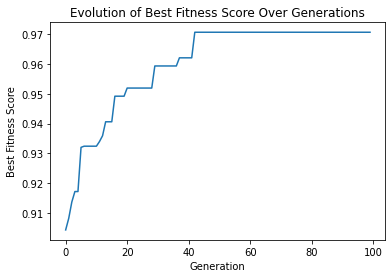

Best Allocation: [1, 1, 9, 7, 2, 8, 1, 3, 7, 1, 0, 5, 5, 9, 8, 2, 4, 6, 0, 7, 8, 4, 8, 4, 5, 3, 1, 2, 3, 0, 6, 9, 0, 0, 6, 7, 7, 9, 2, 4, 3, 4, 4, 9, 6, 2, 5, 9, 6, 0, 9, 3, 3, 4, 7, 5, 4, 7, 5, 1, 0, 8, 0, 3, 1, 6, 2, 4, 2, 4, 7, 6, 6, 9, 8, 3, 5, 8, 1, 8, 7, 4, 8, 9, 7, 9, 3, 9, 7, 1, 0, 7, 6, 5, 7, 1, 6, 3, 6, 0]
Best Fitness: 0.970703125


In [5]:
import random
import matplotlib.pyplot as plt

class VirtualMachine:
    def __init__(self, cpu, memory):
        self.cpu = cpu
        self.memory = memory

class PhysicalServer:
    def __init__(self, max_cpu, max_memory):
        self.max_cpu = max_cpu
        self.max_memory = max_memory
        self.vms = []

    def can_host(self, vm):
        return self.available_cpu() >= vm.cpu and self.available_memory() >= vm.memory

    def host(self, vm):
        if self.can_host(vm):
            self.vms.append(vm)
            return True
        return False  # Corrected: removed the erroneous line

    def available_cpu(self):
        return self.max_cpu - sum(vm.cpu for vm in self.vms)

    def available_memory(self):
        return self.max_memory - sum(vm.memory for vm in self.vms)

    def utilization(self):
        if not self.vms:  # Avoid division by zero for empty servers
            return 0
        return ((sum(vm.cpu for vm in self.vms) / self.max_cpu) + 
                (sum(vm.memory for vm in self.vms) / self.max_memory)) / 2

class CloudEnvironment:
    def __init__(self, servers, vms):
        self.servers = servers
        self.vms = vms

    def fitness(self, allocation):
        for server in self.servers:
            server.vms = []
        for vm_index, server_index in enumerate(allocation):
            if server_index is not None:
                self.servers[server_index].host(self.vms[vm_index])
        total_utilization = sum(server.utilization() for server in self.servers if server.vms) / len(self.servers)
        penalty_for_unallocated = allocation.count(None) * 0.01
        for server in self.servers:
            server.vms = []
        return total_utilization - penalty_for_unallocated

    def random_allocation(self):
        return [random.choice(range(len(self.servers))) if self.servers else None for _ in self.vms]

    def mutate(self, allocation):
        mutated = allocation[:]
        for i in range(len(mutated)):
            if random.random() < 0.05:
                mutated[i] = random.choice(range(len(self.servers)))
        return mutated

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(0, len(parent1))
        child = parent1[:crossover_point] + parent2[crossover_point:]
        return child

    def optimize(self, generations=100, population_size=50):
        population = [self.random_allocation() for _ in range(population_size)]
        best_fitness_scores = []
        for generation in range(generations):
            sorted_population = sorted(population, key=self.fitness, reverse=True)
            best_fitness = self.fitness(sorted_population[0])
            best_fitness_scores.append(best_fitness)
            if generation % 10 == 0:
                print(f"Generation {generation}, Best Fitness: {best_fitness}")
            new_population = sorted_population[:2]
            while len(new_population) < population_size:
                parent1, parent2 = random.sample(sorted_population[:10], 2)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                new_population.append(child)
            population = new_population
        plt.plot(best_fitness_scores)
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness Score')
        plt.title('Evolution of Best Fitness Score Over Generations')
        plt.show()
        return sorted_population[0], best_fitness

def generate_workload(num_vms):
    return [VirtualMachine(random.randint(1, 16), random.randint(1, 32)) for _ in range(num_vms)]

# Example usage
num_servers = 10
servers = [PhysicalServer(64, 128) for _ in range(num_servers)]
vms = generate_workload(100)
cloud_env = CloudEnvironment(servers, vms)

best_allocation, best_fitness = cloud_env.optimize()
print(f"Best Allocation: {best_allocation}")
print(f"Best Fitness: {best_fitness}")
